<a href="https://colab.research.google.com/github/nadkhrns18/water-treatment/blob/main/CaseBased2_Nad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Nadia Khairunissa  - 1301204167 - IF4412`**

**IMPORT LIBRARY**

In [ ]:
import numpy as np
import pandas as pd
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.linalg import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**UPLOAD FILE CSV (Github)**

In [ ]:
Dataset = pd.read_csv("https://raw.githubusercontent.com/nadkhrns18/CaseBased_2/main/water-treatment.csv", header = None)
Dataset

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101,1.5,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70,?,79.4,87.3,99.6
1,D-2/3/90,39024,3,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.5,8.0,242,496,176,64.8,4,2110,...,2120,?,62.7,95.6,?,71,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4,988,...,950,?,58.3,97.8,83,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922,0.3,7.4,139,367,180,64.4,3,1060,...,1136,?,65,97.1,76.2,66.4,82,77.1,88.9,99
525,D-29/8/91,32190,0.3,7.3,200,545,258,65.1,4,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87,89.5,99.8


In [ ]:
#Menghapus column 0 karena column 0 adalah tanggal dan mengubah "?" menjadi NAN
Dataset.drop(Dataset.columns[0], inplace = True, axis = 1)  
df=Dataset.replace("?",np.NaN)
df

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,44101,1.5,7.8,NaN,407,166,66.3,4.5,2110,7.9,...,2000,NaN,58.8,95.5,NaN,70,NaN,79.4,87.3,99.6
1,39024,3,7.7,NaN,443,214,69.2,6.5,2660,7.7,...,2590,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
2,32229,5,7.6,NaN,528,186,69.9,3.4,1666,7.7,...,1888,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,35023,3.5,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.5,8.0,242,496,176,64.8,4,2110,7.9,...,2120,NaN,62.7,95.6,NaN,71,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723,0.16,7.7,93,252,176,56.8,2.3,894,7.7,...,942,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,33535,0.32,7.8,192,346,172,68.6,4,988,7.8,...,950,NaN,58.3,97.8,83,59.1,91.1,74.6,90.7,100
524,32922,0.3,7.4,139,367,180,64.4,3,1060,7.5,...,1136,NaN,65,97.1,76.2,66.4,82,77.1,88.9,99
525,32190,0.3,7.3,200,545,258,65.1,4,1260,7.4,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87,89.5,99.8


In [ ]:
#Mengubah nilai NAN menjadi nilai Mean
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.mean())
df

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,44101.0,1.50,7.8,188.714286,407.0,166.0,66.3,4.500000,2110,7.9,...,2000.0,39.085806,58.8,95.5000,83.448049,70.0,89.013646,79.4,87.3,99.60000
1,39024.0,3.00,7.7,188.714286,443.0,214.0,69.2,6.500000,2660,7.7,...,2590.0,39.085806,60.7,94.8000,83.448049,80.8,89.013646,79.5,92.1,100.00000
2,32229.0,5.00,7.6,188.714286,528.0,186.0,69.9,3.400000,1666,7.7,...,1888.0,39.085806,58.2,95.6000,83.448049,52.9,89.013646,75.8,88.7,98.50000
3,35023.0,3.50,7.9,205.000000,588.0,192.0,65.6,4.500000,2430,7.8,...,1840.0,33.100000,64.2,95.3000,87.300000,72.3,90.200000,82.3,89.6,100.00000
4,36924.0,1.50,8.0,242.000000,496.0,176.0,64.8,4.000000,2110,7.9,...,2120.0,39.085806,62.7,95.6000,83.448049,71.0,92.100000,78.2,87.5,99.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723.0,0.16,7.7,93.000000,252.0,176.0,56.8,2.300000,894,7.7,...,942.0,39.085806,62.3,93.3000,69.800000,75.9,79.600000,78.6,96.6,99.60000
523,33535.0,0.32,7.8,192.000000,346.0,172.0,68.6,4.000000,988,7.8,...,950.0,39.085806,58.3,97.8000,83.000000,59.1,91.100000,74.6,90.7,100.00000
524,32922.0,0.30,7.4,139.000000,367.0,180.0,64.4,3.000000,1060,7.5,...,1136.0,39.085806,65.0,97.1000,76.200000,66.4,82.000000,77.1,88.9,99.00000
525,32190.0,0.30,7.3,200.000000,545.0,258.0,65.1,4.000000,1260,7.4,...,1326.0,39.800000,65.9,97.1000,81.700000,70.9,89.500000,87.0,89.5,99.80000


In [ ]:
#Pengecekan nilai NULL/NAN
print("Jumlah NULL/NAN: ", df.isnull().sum().sum())

Jumlah NULL/NAN:  0


In [ ]:
#Menampilkan nama kolom dari water-treatments.name
dataframe = pd.DataFrame(df.to_numpy(), columns = ["Q-E", "ZN-E", "PH-E", "DBO-E", "DQO-E", "SS-E", 
    "SSV-E", "SED-E", "COND-E", "PH-P", "DBO-P", "SS-P", "SSV-P", "SED-P", "COND-P",
    "PH-D", "DBO-D", "DQO-D", "SS-D", "SSV-D", "SED-D", "COND-D", "PH-S", "DBO-S",
    "DQO-S", "SS-S", "SSV-S", "SED-S", "COND-S", "RD-DBO-P", "RD-SS-P", "RD-SED-P",
    "RD-DBO-S", "RD-DQO-S", "RD-DBO-G", "RD-DQO-G", "RD-SS-G", "RD-SED-G"])

dataframe

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101.0,1.50,7.8,188.714286,407.0,166.0,66.3,4.500000,2110.0,7.9,...,2000.0,39.085806,58.8,95.5000,83.448049,70.0,89.013646,79.4,87.3,99.60000
1,39024.0,3.00,7.7,188.714286,443.0,214.0,69.2,6.500000,2660.0,7.7,...,2590.0,39.085806,60.7,94.8000,83.448049,80.8,89.013646,79.5,92.1,100.00000
2,32229.0,5.00,7.6,188.714286,528.0,186.0,69.9,3.400000,1666.0,7.7,...,1888.0,39.085806,58.2,95.6000,83.448049,52.9,89.013646,75.8,88.7,98.50000
3,35023.0,3.50,7.9,205.000000,588.0,192.0,65.6,4.500000,2430.0,7.8,...,1840.0,33.100000,64.2,95.3000,87.300000,72.3,90.200000,82.3,89.6,100.00000
4,36924.0,1.50,8.0,242.000000,496.0,176.0,64.8,4.000000,2110.0,7.9,...,2120.0,39.085806,62.7,95.6000,83.448049,71.0,92.100000,78.2,87.5,99.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723.0,0.16,7.7,93.000000,252.0,176.0,56.8,2.300000,894.0,7.7,...,942.0,39.085806,62.3,93.3000,69.800000,75.9,79.600000,78.6,96.6,99.60000
523,33535.0,0.32,7.8,192.000000,346.0,172.0,68.6,4.000000,988.0,7.8,...,950.0,39.085806,58.3,97.8000,83.000000,59.1,91.100000,74.6,90.7,100.00000
524,32922.0,0.30,7.4,139.000000,367.0,180.0,64.4,3.000000,1060.0,7.5,...,1136.0,39.085806,65.0,97.1000,76.200000,66.4,82.000000,77.1,88.9,99.00000
525,32190.0,0.30,7.3,200.000000,545.0,258.0,65.1,4.000000,1260.0,7.4,...,1326.0,39.800000,65.9,97.1000,81.700000,70.9,89.500000,87.0,89.5,99.80000


**Normalisasi**

In [ ]:
#Melakukan normalisasi data
normdf=(df.to_numpy()-df.to_numpy().min())/(df.to_numpy().max()-df.to_numpy().min())
normdf

array([[7.34025732e-01, 2.49662955e-05, 1.29824737e-04, ...,
        1.32154924e-03, 1.45303840e-03, 1.65776202e-03],
       [6.49523144e-01, 4.99325910e-05, 1.28160317e-04, ...,
        1.32321366e-03, 1.53293054e-03, 1.66441970e-03],
       [5.36425825e-01, 8.32209850e-05, 1.26495897e-04, ...,
        1.26163013e-03, 1.47634027e-03, 1.63945340e-03],
       ...,
       [5.47960254e-01, 4.99325910e-06, 1.23167058e-04, ...,
        1.28326759e-03, 1.47966911e-03, 1.64777550e-03],
       [5.35776701e-01, 4.99325910e-06, 1.21502638e-04, ...,
        1.44804514e-03, 1.48965563e-03, 1.66109086e-03],
       [5.07448278e-01, 3.49528137e-06, 1.24831478e-04, ...,
        1.35983089e-03, 1.43805862e-03, 1.64921174e-03]])

In [ ]:
datanorm = pd.DataFrame(normdf, columns = ["Q-E", "ZN-E", "PH-E", "DBO-E", "DQO-E", "SS-E", 
    "SSV-E", "SED-E", "COND-E", "PH-P", "DBO-P", "SS-P", "SSV-P", "SED-P", "COND-P",
    "PH-D", "DBO-D", "DQO-D", "SS-D", "SSV-D", "SED-D", "COND-D", "PH-S", "DBO-S",
    "DQO-S", "SS-S", "SSV-S", "SED-S", "COND-S", "RD-DBO-P", "RD-SS-P", "RD-SED-P",
    "RD-DBO-S", "RD-DQO-S", "RD-DBO-G", "RD-DQO-G", "RD-SS-G", "RD-SED-G"])

DataPakai_idx = datanorm.index
Skala = MinMaxScaler()
skala_data = Skala.fit_transform(datanorm)
skala_data

array([[0.68059803, 0.04191617, 0.5       , ..., 0.76299113, 0.86419753,
        0.99371069],
       [0.57912095, 0.08682635, 0.44444444, ..., 0.76425856, 0.91806958,
        1.        ],
       [0.44330515, 0.14670659, 0.38888889, ..., 0.71736375, 0.87991021,
        0.97641509],
       ...,
       [0.45715656, 0.00598802, 0.27777778, ..., 0.7338403 , 0.88215488,
        0.98427673],
       [0.44252563, 0.00598802, 0.22222222, ..., 0.85931559, 0.88888889,
        0.99685535],
       [0.40850673, 0.00329341, 0.33333333, ..., 0.79214195, 0.85409652,
        0.9856335 ]])

In [ ]:
#Mengisi Kembali nilai yang sudah di scale ke dalam dataFrame
df_cluster = pd.DataFrame(data = skala_data[:,:], columns=["Q-E", "ZN-E", "PH-E", "DBO-E", "DQO-E", "SS-E", 
    "SSV-E", "SED-E", "COND-E", "PH-P", "DBO-P", "SS-P", "SSV-P", "SED-P", "COND-P",
    "PH-D", "DBO-D", "DQO-D", "SS-D", "SSV-D", "SED-D", "COND-D", "PH-S", "DBO-S",
    "DQO-S", "SS-S", "SSV-S", "SED-S", "COND-S", "RD-DBO-P", "RD-SS-P", "RD-SED-P",
    "RD-DBO-S", "RD-DQO-S", "RD-DBO-G", "RD-DQO-G", "RD-SS-G", "RD-SED-G"])
df_cluster = df_cluster.set_index(DataPakai_idx)
df_cluster

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,0.680598,0.041916,0.500000,0.387504,0.379070,0.035602,0.739554,0.115169,0.565723,0.500000,...,0.403122,0.490265,0.589207,0.951246,0.869920,0.719078,0.896817,0.762991,0.864198,0.993711
1,0.579121,0.086826,0.444444,0.387504,0.420930,0.060733,0.779944,0.171348,0.778984,0.333333,...,0.583716,0.490265,0.610132,0.943662,0.869920,0.832285,0.896817,0.764259,0.918070,1.000000
2,0.443305,0.146707,0.388889,0.387504,0.519767,0.046073,0.789694,0.084270,0.393563,0.333333,...,0.368840,0.490265,0.582599,0.952329,0.869920,0.539832,0.896817,0.717364,0.879910,0.976415
3,0.499151,0.101796,0.555556,0.427518,0.589535,0.049215,0.729805,0.115169,0.689802,0.416667,...,0.354148,0.414013,0.648678,0.949079,0.914451,0.743187,0.912145,0.799747,0.890011,1.000000
4,0.537147,0.041916,0.611111,0.518428,0.482558,0.040838,0.718663,0.101124,0.565723,0.500000,...,0.439853,0.490265,0.632159,0.952329,0.869920,0.729560,0.936693,0.747782,0.866442,0.992138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.453179,0.001796,0.444444,0.152334,0.198837,0.040838,0.607242,0.053371,0.094223,0.333333,...,0.079278,0.490265,0.627753,0.927411,0.712139,0.780922,0.775194,0.752852,0.968575,0.993711
523,0.469409,0.006587,0.500000,0.395577,0.308140,0.038743,0.771588,0.101124,0.130671,0.416667,...,0.081726,0.490265,0.583700,0.976165,0.864740,0.604822,0.923773,0.702155,0.902357,1.000000
524,0.457157,0.005988,0.277778,0.265356,0.332558,0.042932,0.713092,0.073034,0.158589,0.166667,...,0.138659,0.490265,0.657489,0.968581,0.786127,0.681342,0.806202,0.733840,0.882155,0.984277
525,0.442526,0.005988,0.222222,0.415233,0.539535,0.083770,0.722841,0.101124,0.236138,0.083333,...,0.196817,0.499363,0.667401,0.968581,0.849711,0.728512,0.903101,0.859316,0.888889,0.996855


**Menggunakan PCA untuk Mereduksi Dimensi Data**

In [ ]:
pca = PCA(n_components=2) #Memakai Principle Component Analysis untuk merubah data menjadi 2 dimensi
principal = pca.fit_transform(df_cluster)
df_pca = pd.DataFrame(data=principal, columns=['pca1','pca2'])
df_pca

,pca1,pca2
0,-0.239777,0.072020
1,-0.565577,0.118916
2,-0.081001,-0.089233
3,-0.520566,0.090176
4,-0.351204,0.213549
...,...,...
522,0.525885,-0.329480
523,0.246667,-0.252271
524,0.401515,-0.256268
525,0.293881,-0.077771


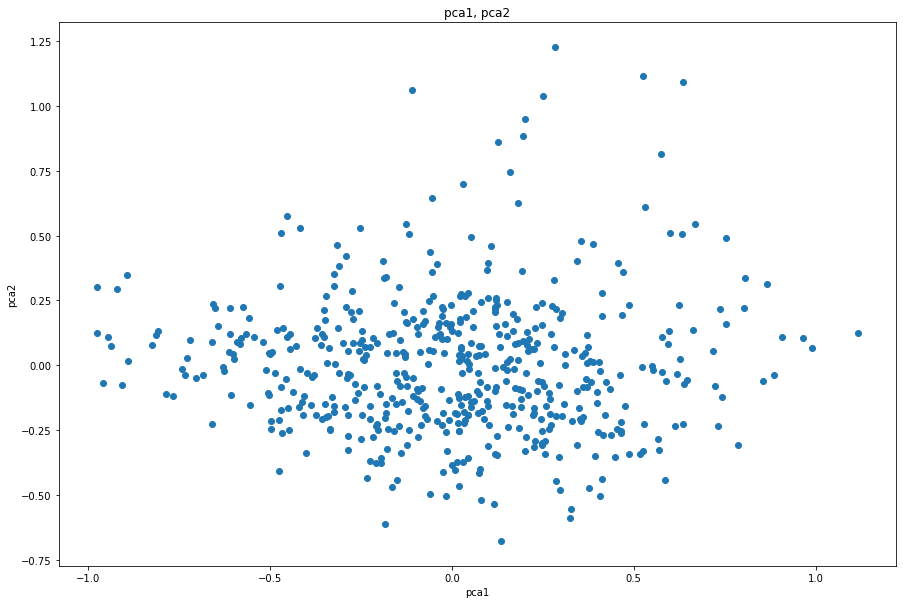

In [ ]:
#Scatter Plot sebelum clustering
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(df_pca.iloc[:,0] , df_pca.iloc[:,1] )
ax.set_xlabel(df_pca.columns[0])
ax.set_ylabel(df_pca.columns[1])
plt.title("pca1, pca2")
plt.show()

**Implementasi KMeans Class**

In [ ]:
class Kmeans:

    def __init__(self, n_klaster, max_iteration=100, random_state=123):
        self.n_klaster = n_klaster
        self.max_iteration = max_iteration
        self.random_state = random_state

    #Inisialisasi Centroids secara Random
    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_klaster]]
        return centroids

    #Menghitung Centroids
    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_klaster, X.shape[1]))
        for k in range(self.n_klaster):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    #Menghitung Jarak
    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_klaster))
        for k in range(self.n_klaster):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    #Menghitung Sum of Square
    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_klaster):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    #Fit Data
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iteration):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        return self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

In [ ]:
z = df_pca.values 
K = 3
km = Kmeans(n_klaster=K, max_iteration=100) #Modelling data dengan KMeans
km.fit(z)
centroids = km.centroids

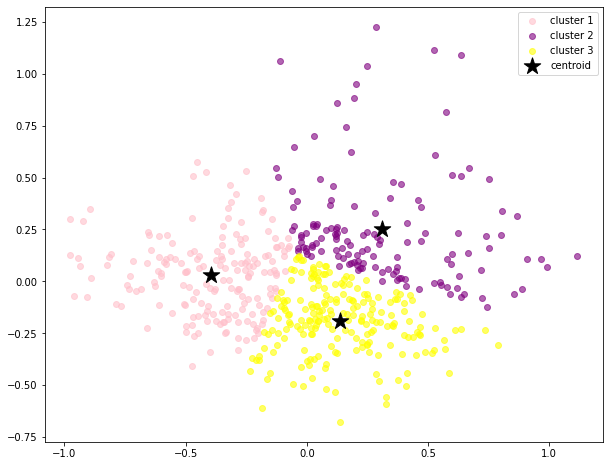

In [ ]:
#Plotiing data yang sudah di clustering untuk di visualisasi

fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(z[km.labels == 0, 0], z[km.labels == 0, 1],
            c='pink', label='cluster 1', alpha=0.6)
plt.scatter(z[km.labels == 1, 0], z[km.labels == 1, 1],
            c='purple', label='cluster 2', alpha=0.6)
plt.scatter(z[km.labels == 2, 0], z[km.labels == 2, 1],
            c='yellow', label='cluster 3', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='black', label='centroid')
plt.legend()

In [ ]:
z = df_pca.values 
K = 4
km = Kmeans(n_klaster=K, max_iteration=100) #Modelling data dengan KMeans
km.fit(z)
centroids = km.centroids

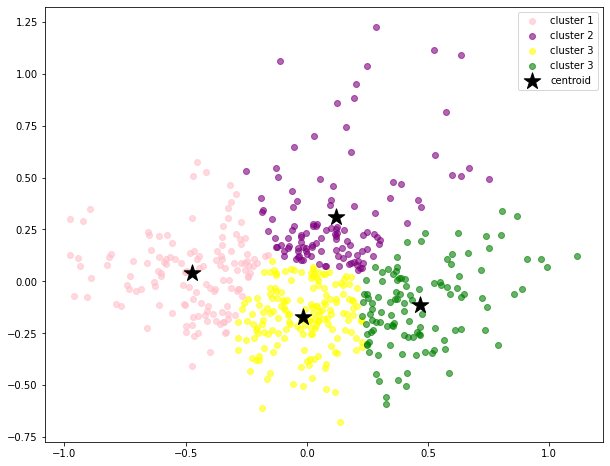

In [ ]:
#Plotiing data yang sudah di clustering untuk di visualisasi

fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(z[km.labels == 0, 0], z[km.labels == 0, 1],
            c='pink', label='cluster 1', alpha=0.6)
plt.scatter(z[km.labels == 1, 0], z[km.labels == 1, 1],
            c='purple', label='cluster 2', alpha=0.6)
plt.scatter(z[km.labels == 2, 0], z[km.labels == 2, 1],
            c='yellow', label='cluster 3', alpha=0.6)
plt.scatter(z[km.labels == 3, 0], z[km.labels == 3, 1],
            c='green', label='cluster 3', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='black', label='centroid')
plt.legend()

In [ ]:
z = df_pca.values 
K = 7
km = Kmeans(n_klaster=K, max_iteration=100) #Modelling data dengan KMeans
km.fit(z)
centroids = km.centroids

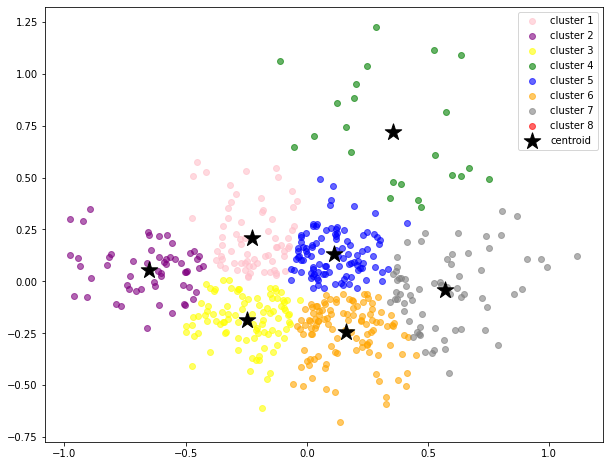

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(z[km.labels == 0, 0], z[km.labels == 0, 1],
            c='pink', label='cluster 1', alpha=0.6)
plt.scatter(z[km.labels == 1, 0], z[km.labels == 1, 1],
            c='purple', label='cluster 2', alpha=0.6)
plt.scatter(z[km.labels == 2, 0], z[km.labels == 2, 1],
            c='yellow', label='cluster 3', alpha=0.6)
plt.scatter(z[km.labels == 3, 0], z[km.labels == 3, 1],
            c='green', label='cluster 4', alpha=0.6)
plt.scatter(z[km.labels == 4, 0], z[km.labels == 4, 1],
            c='blue', label='cluster 5', alpha=0.6)
plt.scatter(z[km.labels == 5, 0], z[km.labels == 5, 1],
            c='orange', label='cluster 6', alpha=0.6)
plt.scatter(z[km.labels == 6, 0], z[km.labels == 6, 1],
            c='grey', label='cluster 7', alpha=0.6)
plt.scatter(z[km.labels == 7, 0], z[km.labels == 7, 1],
            c='red', label='cluster 8', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='black', label='centroid')
plt.legend()

In [ ]:
disortions = []
K = range(1,10)
for k in K:
    kmeanModel = Kmeans(n_klaster=k)
    disortions.append(kmeanModel.fit(z))

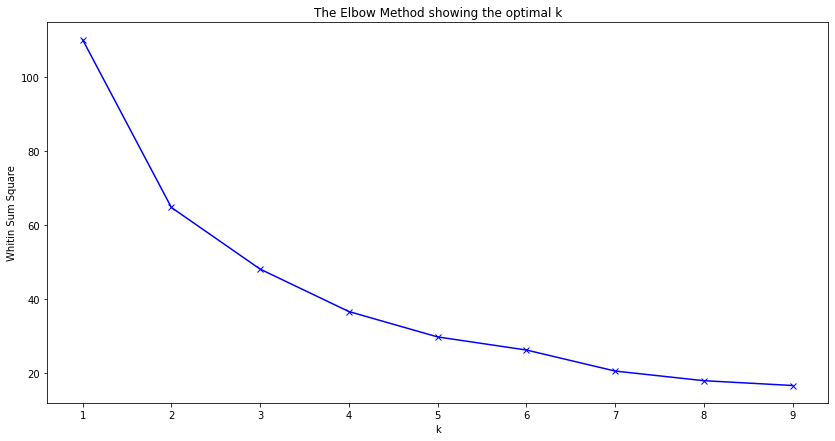

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(K, disortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Whitin Sum Square')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import KneeLocator
kn = KneeLocator(range(1, 10), disortions, curve='convex', direction='decreasing')
optimum_K= (kn.knee)
print("Optimum K:",optimum_K)

Optimum K: 3
